<a href="https://colab.research.google.com/github/mchirico/COVID-19/blob/master/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**COVID-19**

Note:  You need to make a copy of this note book, if you want to run it yourself
by clicking on "File/Save a copy in Drive"



Sharable link:
https://colab.research.google.com/drive/1RZXskxLFGTMcw7Q88VwIWk7vSceGbIkf?usp=sharing








Data From: 
[JHU CSSE](https://github.com/CSSEGISandData/COVID-19)



In [0]:
import requests
import pandas as pd
import numpy as np 
from datetime import datetime



import warnings
warnings.filterwarnings("ignore")

try:
  import seaborn as sns
  import matplotlib.pyplot as plt
  import matplotlib.dates as mdates
  sns.set(style="white", color_codes=True)
  from matplotlib_venn import venn2
  import pydot
  import libarchive
  import torch
except:
  print("Will try to install software")
  # Lines below .... Only need to be run once at the top of the notebook.
  !pip install -q matplotlib-venn
  # #   https://pypi.python.org/pypi/pydot
  !apt-get -qq install -y graphviz && pip install -q pydot
  !apt-get -qq install -y libarchive-dev && pip install -q -U libarchive
  !pip install -U -q PyDrive
  !pip install --upgrade -q gspread
  
  !pip install torchvision
  
  import seaborn as sns
  import matplotlib.pyplot as plt
  import matplotlib.dates as mdates
  sns.set(style="white", color_codes=True)
  from matplotlib_venn import venn2
  import pydot
  import libarchive





In [0]:
TMP = '/tmp/data'

from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile
zipurl = 'https://ihmecovid19storage.blob.core.windows.net/latest/ihme-covid19.zip'
with urlopen(zipurl) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
        zfile.extractall(TMP)

In [16]:
file = !find  /tmp/data -iname '*.csv'
sdate = file[0][len(TMP)+1: len(TMP)+11]
startDate = datetime.strptime(sdate,'%Y_%m_%d')
startDate

datetime.datetime(2020, 5, 16, 0, 0)

['/tmp/data/2020_05_16/Summary_stats_all_locs.csv',
 '/tmp/data/2020_05_16/Hospitalization_all_locs.csv']

In [0]:
for f in file:
  if 'Hospitalization_all_locs.csv' in f:
    file_hospital = f
  if 'Summary' in f:
    file_summary = f


In [26]:
fh=pd.read_csv(file_hospital)
fh[fh['confirmed_infections'] >= 20].head()


,V1,location_name,date,allbed_mean,allbed_lower,allbed_upper,ICUbed_mean,ICUbed_lower,ICUbed_upper,InvVen_mean,InvVen_lower,InvVen_upper,deaths_mean,deaths_lower,deaths_upper,admis_mean,admis_lower,admis_upper,newICU_mean,newICU_lower,newICU_upper,totdea_mean,totdea_lower,totdea_upper,bedover_mean,bedover_lower,bedover_upper,icuover_mean,icuover_lower,icuover_upper,deaths_mean_smoothed,deaths_lower_smoothed,deaths_upper_smoothed,totdea_mean_smoothed,totdea_lower_smoothed,totdea_upper_smoothed,mobility_data_type,mobility_composite,total_tests_data_type,total_tests,confirmed_infections,est_infections_mean,est_infections_lower,est_infections_upper
86,87,Abruzzo,2020-03-13,29.2308,25.59875,33.90125,8.70435,8.35000,9.15,8.51655,8.20000,8.90,0.0,0.0,0.0,7.33480,5.75000,9.80000,2.23375,2.05,2.50,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,observed,-52.948603,observed,232.285689,20.131392,826.189550,745.971691,972.042365
87,88,Abruzzo,2020-03-14,39.2533,34.90000,44.70375,10.94060,10.50000,11.45,10.69065,10.34875,11.10,0.0,0.0,0.0,11.02250,8.90000,14.05000,3.23625,3.05,3.50,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,observed,-57.046048,observed,240.142831,24.836706,823.524194,729.045519,963.999803
88,89,Abruzzo,2020-03-15,50.4921,45.45000,56.30000,14.40890,13.90000,15.00,14.03620,13.60000,14.55,1.0,1.0,1.0,14.67725,12.10000,18.00000,4.46830,4.15,4.85,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,3.0,3.0,observed,-60.807399,observed,247.999973,30.383177,802.848340,681.599177,938.981127
89,90,Abruzzo,2020-03-16,65.4203,59.15000,71.85000,18.88345,18.29875,19.55,18.38590,17.90000,18.95,1.0,1.0,1.0,18.32120,15.44875,21.75000,5.47455,5.20,5.85,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,4.0,4.0,4.0,observed,-64.197910,observed,255.857115,37.072555,768.629183,638.829697,922.787529
90,91,Abruzzo,2020-03-17,83.9820,76.79750,91.50000,24.59685,23.85000,25.45,23.91260,23.30000,24.60,2.0,2.0,2.0,21.99235,18.80000,26.05125,6.71340,6.35,7.20,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,6.0,6.0,6.0,observed,-67.202367,observed,263.714257,44.985402,728.341945,607.858866,880.246094


In [28]:
fs=pd.read_csv(file_summary)
fs.head()

,location_name,peak_bed_day_mean,peak_bed_day_lower,peak_bed_day_upper,peak_icu_bed_day_mean,peak_icu_bed_day_lower,peak_icu_bed_day_upper,peak_vent_day_mean,peak_vent_day_lower,peak_vent_day_upper,all_bed_capacity,icu_bed_capacity,all_bed_usage,icu_bed_usage,available_all_nbr,available_icu_nbr,travel_limit_start_date,travel_limit_end_date,stay_home_start_date,stay_home_end_date,educational_fac_start_date,educational_fac_end_date,any_gathering_restrict_start_date,any_gathering_restrict_end_date,any_business_start_date,any_business_end_date,all_non-ess_business_start_date,all_non-ess_business_end_date
0,Abruzzo,2020-03-30,2020-03-29,2020-03-31,2020-03-30,2020-03-29,2020-03-31,2020-03-30,2020-03-29,2020-03-30,4270.0,153.0,3322.0,112.0,948.0,41.0,2020-03-22,2020-05-04,2020-03-11,NaN,2020-03-05,NaN,2020-03-11,NaN,2020-03-11,NaN,2020-03-11,2020-04-14
1,Alabama,2020-05-12,2020-05-06,2020-06-13,2020-05-12,2020-05-11,2020-06-14,2020-05-12,2020-05-10,2020-06-12,17537.0,1525.0,11793.0,1050.0,5744.0,475.0,NaN,NaN,2020-04-04,2020-04-30,2020-03-19,NaN,2020-03-19,NaN,2020-03-19,NaN,2020-03-28,2020-04-30
2,Alaska,2020-04-01,2020-04-01,2020-04-01,2020-04-04,2020-04-04,2020-04-04,2020-04-04,2020-04-04,2020-04-04,2034.0,169.0,1351.0,115.0,683.0,54.0,2020-03-28,2020-04-24,2020-03-28,2020-04-24,2020-03-16,NaN,2020-03-24,NaN,2020-03-17,NaN,2020-03-28,2020-04-24
3,Alberta,2020-05-04,2020-05-02,2020-06-04,2020-05-04,2020-05-02,2020-06-06,2020-05-04,2020-05-02,2020-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-16,NaN,2020-03-12,NaN,2020-03-18,NaN,NaN,NaN
4,Amazonas,2020-05-22,2020-05-06,2020-05-29,2020-05-23,2020-05-08,2020-05-31,2020-05-22,2020-05-08,2020-05-29,4747.0,276.0,3721.0,236.0,1026.0,40.0,NaN,NaN,NaN,NaN,2020-03-16,NaN,2020-03-31,NaN,2020-03-19,NaN,2020-03-24,NaN


In [5]:
p2=pd.read_csv(file[1])
#p[p['confirmed_infections'] >= 20].head()
p2.head()


,V1,location_name,date,allbed_mean,allbed_lower,allbed_upper,ICUbed_mean,ICUbed_lower,ICUbed_upper,InvVen_mean,InvVen_lower,InvVen_upper,deaths_mean,deaths_lower,deaths_upper,admis_mean,admis_lower,admis_upper,newICU_mean,newICU_lower,newICU_upper,totdea_mean,totdea_lower,totdea_upper,bedover_mean,bedover_lower,bedover_upper,icuover_mean,icuover_lower,icuover_upper,deaths_mean_smoothed,deaths_lower_smoothed,deaths_upper_smoothed,totdea_mean_smoothed,totdea_lower_smoothed,totdea_upper_smoothed,mobility_data_type,mobility_composite,total_tests_data_type,total_tests,confirmed_infections,est_infections_mean,est_infections_lower,est_infections_upper
0,1,Abruzzo,2019-12-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,2,Abruzzo,2019-12-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,3,Abruzzo,2019-12-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,4,Abruzzo,2019-12-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,5,Abruzzo,2019-12-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


## Mobility Data




In [6]:
# Apple - needs to be updated 
#.   from: https://www.apple.com/covid19/mobility
url = 'https://storage.googleapis.com/montco-stats/applemobilitytrends.csv'
apple=pd.read_csv(url)
apple.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,...,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,103.55,112.67,104.83,94.39,94.07,93.51,92.94,102.13,102.38,101.41,94.62,89.12,90.17,90.21,97.71,102.50,108.92,92.82,91.48,93.99,96.72,102.46,103.29,107.83,87.99,94.18,94.62,99.70,139.30,123.90,...,26.43,26.70,26.32,25.47,24.89,32.64,31.43,30.67,30.00,29.26,22.94,24.55,31.51,33.59,31.69,33.94,30.22,25.22,30.39,37.39,36.69,35.90,38.09,37.23,29.36,36.00,43.69,42.61,43.11,46.13,45.78,41.59,45.39,NaN,NaN,49.19,50.20,48.30,46.78,45.51
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,100.85,100.13,82.13,95.65,97.78,95.39,94.24,93.73,97.06,77.27,83.37,82.73,84.39,88.19,90.79,88.70,79.32,87.12,88.06,99.40,85.84,94.63,99.74,81.41,90.19,90.45,94.16,95.69,109.21,108.40,...,29.81,28.96,27.29,27.63,29.59,35.52,38.08,35.48,39.15,34.58,27.76,27.93,36.72,34.46,35.39,34.80,34.63,29.00,35.22,41.83,37.53,41.49,38.25,38.68,32.28,43.41,49.59,46.44,52.84,52.37,48.10,44.86,68.87,NaN,NaN,61.79,56.46,54.41,48.36,45.20
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,118.45,124.01,95.44,95.13,95.42,97.66,99.42,113.34,118.23,91.31,93.37,91.12,92.35,96.74,111.24,123.96,89.01,91.66,89.18,94.49,95.98,111.12,121.53,89.23,96.42,96.97,101.68,104.90,122.91,127.62,...,19.95,19.80,16.80,19.40,12.89,21.10,22.29,23.55,24.40,27.17,23.19,14.54,26.67,27.25,27.61,28.73,30.99,25.92,16.57,27.45,27.12,32.22,34.45,22.69,28.23,16.44,32.01,33.63,35.13,35.56,40.25,33.82,19.82,NaN,NaN,38.87,41.01,44.34,38.29,22.01
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,116.72,114.14,84.54,101.37,106.12,104.91,102.56,104.88,98.83,73.64,94.27,93.86,92.20,96.00,98.99,97.42,67.21,95.18,96.25,100.39,99.10,105.00,106.45,73.12,104.20,105.87,111.47,113.20,128.75,103.47,...,15.51,14.65,13.58,15.75,10.45,16.35,16.66,17.42,18.18,18.80,17.03,10.59,18.44,19.01,18.47,20.39,22.32,23.31,16.36,18.48,17.49,22.78,24.80,16.62,20.61,12.44,21.35,22.63,23.84,23.84,30.63,24.84,15.58,NaN,NaN,28.33,28.44,31.63,28.81,18.49
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,109.08,89.00,99.35,103.53,106.80,107.40,115.65,109.66,88.59,85.18,95.91,99.40,99.92,103.04,103.73,85.73,93.39,95.83,98.63,102.40,107.46,106.55,86.33,98.78,100.08,103.28,106.19,116.62,115.36,93.51,...,59.24,33.19,36.00,26.95,31.72,53.14,55.91,56.56,58.77,47.51,36.90,53.34,56.93,58.06,59.69,62.87,47.84,41.89,55.39,59.09,59.46,59.46,63.12,58.40,48.67,58.18,62.51,64.04,66.19,71.34,67.64,50.96,63.56,NaN,NaN,71.12,77.24,79.75,65.88,72.17


In [11]:
montco = apple[(apple['region']=='Montgomery County') & (apple['sub-region']=='Pennsylvania')]
montco

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,...,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17
2868,county,Montgomery County,driving,NaN,Pennsylvania,United States,100.0,105.78,106.53,107.73,123.4,85.88,87.63,102.49,99.64,103.47,104.6,119.09,114.12,81.82,94.53,102.46,102.33,108.57,118.07,114.4,76.35,94.06,99.4,100.69,104.58,114.25,115.58,87.66,97.63,102.97,106.81,124.33,134.73,121.15,...,45.9,45.03,52.41,48.35,30.3,38.01,48.29,49.81,50.67,56.34,51.6,45.22,51.62,48.63,54.88,53.19,57.04,62.76,38.9,52.16,60.83,58.62,55.65,72.99,70.8,55.94,63.74,67.49,64.22,74.62,77.81,74.78,62.08,NaN,NaN,79.14,80.2,96.19,88.12,68.82


In [12]:
montco = apple[(apple['region']=='Montgomery County') & (apple['sub-region']=='Pennsylvania')]
n=pd.melt(montco, id_vars=['region'], value_vars=montco.columns[6::])
n.columns = ['region', 'timeStamp', 'value']
n['timeStamp'] = n['timeStamp'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
n.head()

,region,timeStamp,value
0,Montgomery County,2020-01-13,100.00
1,Montgomery County,2020-01-14,105.78
2,Montgomery County,2020-01-15,106.53
3,Montgomery County,2020-01-16,107.73
4,Montgomery County,2020-01-17,123.40


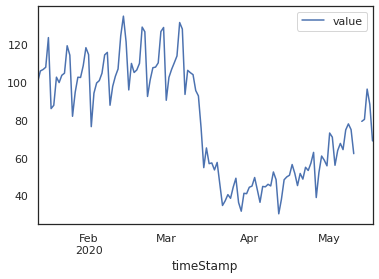

In [13]:
n.plot.line(x='timeStamp',y='value');

## DescartesLabs
Data for Mobility Changes in Response to COVID-19
https://github.com/descarteslabs/DL-COVID-19

In [0]:
url = 'https://github.com/descarteslabs/DL-COVID-19/raw/master/DL-us-m50.csv'
mobility=pd.read_csv(url)
mobility.head()

In [0]:
t=mobility
t[(t['admin1']=='Pennsylvania') & (t['admin2']=='Montgomery County')]

In [0]:
n=pd.melt(mobility, id_vars=['fips'], value_vars=mobility.columns[5::])

n.columns = ['fips', 'timeStamp', 'value']
n['timeStamp'] = n['timeStamp'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

n.head()

In [0]:
n[n['fips']==42091.0].plot.line(x='timeStamp',y='value');


## Google Mobility

https://www.google.com/covid19/mobility/index.html?hl=en

In [0]:
import random
url = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv?cachebust=57b4ac4fc{}40528e2a'.format(random.uniform(0,200))
gmobility=pd.read_csv(url)
gmobility.head()

# Reading Johns Hopkins

#### Read in Confirmed Cases

In [0]:
# 
url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
d=pd.read_csv(url)
d.head()

In [0]:
PERIODS = 7

c=d
cols = d.columns[10:11].tolist() + d.columns[11::].tolist()
cols
c=c[cols]
c=c.set_index('Combined_Key')
x=c.diff(axis=1,periods=PERIODS)
x=x.reset_index()
c=c.diff(axis=1)

c=c.reset_index()
c

In [0]:
x.head()

In [0]:
n=pd.melt(x, id_vars=['Combined_Key'], value_vars=x.columns[2::])
n.columns = ['Country/Region', 'timeStamp',  'value']
n['timeStamp'] = n['timeStamp'].apply(lambda x: datetime.strptime(x,'%m/%d/%y'))
n.head()

## N is smoother

In [0]:

regions = ['Montgomery, Pennsylvania, US']
for region in regions:
  z= n[n['Country/Region'].str.find(region,0)==0]
  z['value'].plot.line(x='timeStamp',y='value');

In [0]:
m=pd.melt(c, id_vars=['Combined_Key'], value_vars=c.columns[2::])
m.columns = ['Country/Region', 'timeStamp',  'value']
m['timeStamp'] = m['timeStamp'].apply(lambda x: datetime.strptime(x,'%m/%d/%y'))
m.head()

In [0]:
regions = ['Bucks, Pennsylvania, US','Montgomery, Pennsylvania, US']
for region in regions:
  z= m[m['Country/Region'].str.find(region,0)==0]
  z['value'].plot.line();

In [0]:
regions = ['Bucks, Pennsylvania, US']
for region in regions:
  m[m['Country/Region'].str.find(region,0)==0]['value'].plot.line();

In [0]:
regions = ['Philadelphia, Pennsylvania, US']
regions = ['Potter, Texas, US']
regions = ['Dallas, Texas, US']
#regions = ['New York City, New York, US']
regions = ['Los Angeles, California, US']
regions = ['Philadelphia, Pennsylvania, US','Los Angeles, California, US']
fig=plt.figure()
for region in regions:
  m[m['Country/Region'].str.find(region,0)==0]['value'].plot.line(title=region,xticks=[],ax=fig.add_axes((0.05,0.5,0.4,0.4)));
plt.show()

In [0]:
import matplotlib.pyplot as plt


t = n[(n['Country/Region'].str.find('Pennsylvania',0)!= -1)]
my_list = t[t['value']>100]['Country/Region'].unique()
t=t[t['Country/Region'].isin(my_list)]

for title, group in t.groupby('Country/Region'):
    group.plot(x='timeStamp', y='value', title=title)

In [0]:
import matplotlib.pyplot as plt


t = m[(m['Country/Region'].str.find('Pennsylvania',0)!= -1)]
my_list = t[t['value']>100]['Country/Region'].unique()
t=t[t['Country/Region'].isin(my_list)]

for title, group in t.groupby('Country/Region'):
    group.plot(x='timeStamp', y='value', title=title)

In [0]:
import matplotlib.pyplot as plt
t = m[(m['Country/Region'].str.find('Pennsylvania',0)!= -1)]
for title, group in t.groupby('Country/Region'):
    group.plot(x='timeStamp', y='value', title=title)

In [0]:
delta_days = 20

from datetime import date, timedelta
dt = date.today() - timedelta(delta_days)
dt.strftime("%Y-%m-%d")

In [0]:
penn = m[m['Country/Region'].str.contains('Pennsylvania', regex=False)]
penn = m
penn = penn[penn['timeStamp'] >= dt.strftime("%Y-%m-%d") ]
penn['timeStamp'].describe()

In [0]:

pp = penn.pivot(index='Country/Region', columns='timeStamp', values='value')
#sns.heatmap(pp, annot=True)

In [0]:
pp.diff(axis=1)

In [0]:
t = pp.diff(axis=1).reset_index()
md=pd.melt(t, id_vars=['Country/Region'], value_vars=t.columns[2::])

md.head()

In [0]:
r = md.groupby(['Country/Region', pd.Grouper(key='timeStamp', freq='5d')]).describe()
r = r.reset_index()
r.columns = r.columns.get_level_values(0)
new_index = ['Country/Region', 'timeStamp', 'count',	'mean',	'std',	'min',	'25%',	'50%',	'75%',	'max']
r.columns = new_index

r[r['max'] > 100]

In [0]:
r[r['Country/Region']=='Montgomery, Pennsylvania, US']

In [0]:
r.head()

In [0]:
t=md.groupby(['Country/Region', pd.Grouper(key='timeStamp', freq='3d')]).sum()
t=t.reset_index()
total = t.groupby(['Country/Region']).sum().reset_index()
total[total['Country/Region']=='Montgomery, Pennsylvania, US']

In [0]:
pd.set_option('display.max_rows', 1000)
ts = total.sort_values('value',ascending=False)
ts[ts['value']>100].head(300)

In [0]:

my_list = ts[ts['value']>100]['Country/Region'].tolist()[0:300]
bad_data = m[m['value']<0]['Country/Region'].unique().tolist()

t=m[m['Country/Region'].isin(my_list)]
t = t[~t['Country/Region'].isin(bad_data)]




t=m[m['Country/Region'].isin(my_list)]
t=t[~t['Country/Region'].isin(bad_data)]

for title, group in t.groupby('Country/Region'):
    group.plot(x='timeStamp', y='value', title=title)